# DATA COLLECTION

In [1]:
!pip install opendatasets
import os
import opendatasets as od

In [2]:
dataset = 'https://www.kaggle.com/datasets/thedevastator/online-course-user-engagement-data/data'

In [3]:
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: akilah
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/thedevastator/online-course-user-engagement-data


100%|██████████| 12.3M/12.3M [00:00<00:00, 73.6MB/s]

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [5]:
df = pd.read_csv('/content/online-course-user-engagement-data/Courses.csv')

# DATA PREPROCESSING

In [6]:
df.head()

,index,Random,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
0,0,86,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,NaN,...,0,12/19/2012,11/17/2013,NaN,9.0,NaN,NaN,0,NaN,1.0
1,1,7,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,NaN,...,0,10/15/2012,NaN,NaN,9.0,NaN,1.0,0,NaN,1.0
2,2,70,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,...,0,2/8/2013,11/17/2013,NaN,16.0,NaN,NaN,0,NaN,1.0
3,3,60,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,NaN,...,0,9/17/2012,NaN,NaN,16.0,NaN,NaN,0,NaN,1.0
4,4,3,HarvardX/ER22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,...,0,12/19/2012,NaN,NaN,16.0,NaN,NaN,0,NaN,1.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641138 entries, 0 to 641137
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              641138 non-null  int64  
 1   Random             641138 non-null  int64  
 2   course_id          641138 non-null  object 
 3   userid_DI          641138 non-null  object 
 4   registered         641138 non-null  int64  
 5   viewed             641138 non-null  int64  
 6   explored           641138 non-null  int64  
 7   certified          641138 non-null  int64  
 8   final_cc_cname_DI  641138 non-null  object 
 9   LoE_DI             535130 non-null  object 
 10  YoB                544533 non-null  float64
 11  gender             554332 non-null  object 
 12  grade              592766 non-null  object 
 13  start_time_DI      641138 non-null  object 
 14  last_event_DI      462184 non-null  object 
 15  nevents            441987 non-null  float64
 16  nd

In [8]:
def preprocess_data(df):
  df_new = df.copy()
  df_new['start_time_DI'] = pd.to_datetime(df_new['start_time_DI'])
  df_new['last_event_DI'] = pd.to_datetime(df_new['last_event_DI'])
  df_new['online_duration'] = (df_new['last_event_DI'] - df_new['start_time_DI'])
  df_new['online_duration'] = df_new['online_duration'].dt.days
  df_new['online_duration'] = df_new['online_duration'].clip(lower=0) # Keep only positive values
  df_new['incomplete_flag'] = df_new['incomplete_flag'].fillna(0).astype(int)
  df_new['ndays_act'] = df_new['ndays_act'].fillna(0).astype(int)
  df_new['nchapters'] = df_new['nchapters'].fillna(0).astype(int)
  df_new['nplay_video'] = df_new['nplay_video'].fillna(0).astype(int)
  df_new['nevents'] = df_new['nevents'].fillna(0).astype(int)
  df_new['grade'] = pd.to_numeric(df_new['grade'], errors='coerce') * 100
  df_new['grade'] = df_new['grade'].fillna(0)

  #calculate age
  current = 2013
  df_new['age'] = (current - df_new['YoB'])

  return df_new




In [9]:
df_new = preprocess_data(df)

df_new = df_new.rename(columns={'incomplete_flag': 'complete_flag'})
df_new = df_new.drop(columns=['registered', 'roles'])


In [10]:
#map grade into A, B, C, D
def map_grade(grade):
    if 90 <= grade <= 100:
        return 'A'
    elif 70 <= grade <= 89:
        return 'B'
    elif 50 <= grade <= 69:
        return 'C'
    else:
        return 'D'

df_new['grade_letter'] = df_new['grade'].apply(map_grade)


In [11]:
# Bin active days into weeks
bins = range(0, 205, 7)  # Create bins up to the maximum duration
labels = [f'Week {i//7 + 1}' for i in range(0, 205, 7)][:-1]  # Labels for each bin
df_new['duration_bin'] = pd.cut(df_new['ndays_act'], bins=bins, labels=labels, right=False)

print(df_new['duration_bin'].value_counts())

duration_bin
Week 1     554994
Week 2      41743
Week 3      14397
Week 4       7809
Week 5       5307
Week 6       3838
Week 7       3100
Week 8       2455
Week 9       1899
Week 10      1478
Week 11      1200
Week 12       937
Week 13       633
Week 14       486
Week 15       324
Week 16       230
Week 17       130
Week 18        84
Week 19        42
Week 20        20
Week 21        12
Week 22         8
Week 23         8
Week 24         2
Week 26         1
Week 25         0
Week 27         0
Week 28         0
Week 29         0
Name: count, dtype: int64


In [12]:
df_new.describe()

,index,Random,viewed,explored,certified,YoB,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,complete_flag,online_duration,age
count,641138.000000,641138.000000,641138.000000,641138.000000,641138.000000,544533.000000,641138.000000,641138,462184,641138.000000,641138.000000,641138.000000,641138.000000,641138.000000,641138.000000,462184.000000,544533.000000
mean,320568.500000,50.427443,0.624299,0.061899,0.027587,1985.253279,3.095093,2013-01-02 16:07:19.273916672,2013-03-11 02:44:13.343257344,297.127827,4.260794,32.888877,2.167628,0.018968,0.156224,50.744855,27.746721
min,0.000000,1.000000,0.000000,0.000000,0.000000,1931.000000,0.000000,2012-07-23 00:00:00,2012-07-24 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,160284.250000,25.000000,0.000000,0.000000,0.000000,1982.000000,0.000000,2012-10-01 00:00:00,2012-12-25 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000
50%,320568.500000,50.000000,1.000000,0.000000,0.000000,1988.000000,0.000000,2013-01-10 00:00:00,2013-03-17 00:00:00,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,11.000000,25.000000
75%,480852.750000,75.000000,1.000000,0.000000,0.000000,1991.000000,0.000000,2013-03-10 00:00:00,2013-05-29 00:00:00,66.000000,3.000000,2.000000,2.000000,0.000000,0.000000,73.000000,31.000000
max,641137.000000,100.000000,1.000000,1.000000,1.000000,2013.000000,101.000000,2013-09-08 00:00:00,2013-11-17 00:00:00,197757.000000,205.000000,98517.000000,48.000000,20.000000,1.000000,409.000000,82.000000
std,185080.742781,28.882656,0.484304,0.240973,0.163786,8.891814,14.482340,NaN,NaN,1274.515685,10.547308,234.327790,3.899814,0.229539,0.363068,77.096535,8.891814


In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641138 entries, 0 to 641137
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   index              641138 non-null  int64         
 1   Random             641138 non-null  int64         
 2   course_id          641138 non-null  object        
 3   userid_DI          641138 non-null  object        
 4   viewed             641138 non-null  int64         
 5   explored           641138 non-null  int64         
 6   certified          641138 non-null  int64         
 7   final_cc_cname_DI  641138 non-null  object        
 8   LoE_DI             535130 non-null  object        
 9   YoB                544533 non-null  float64       
 10  gender             554332 non-null  object        
 11  grade              641138 non-null  float64       
 12  start_time_DI      641138 non-null  datetime64[ns]
 13  last_event_DI      462184 non-null  datetime

# EDA & VISUALIZATION


##**1) INSIGHTS ON DROPOUT RATES**
KEY TAKEAWAYS

i) Both visuals reveal critical challenges in user retention within the first week of registration.

ii) **Significant drop-off after registration**. 77% of dropout rates happened within 7 days of user registration. This suggests potential issues with initial user experience, highlight importance of providing immediate value to users.

iii) **Plateu trend of dropout users as weeks increases**. Indicating users who resist the initial days are more likely to stay. Users who stays until after spending 8 weeks (2 months learning) are 0.01% of total users.

Recommendations:
- investigate demographic of retained users, enabling more targeted promotion.
- analyze factors contributing to users engagement


---



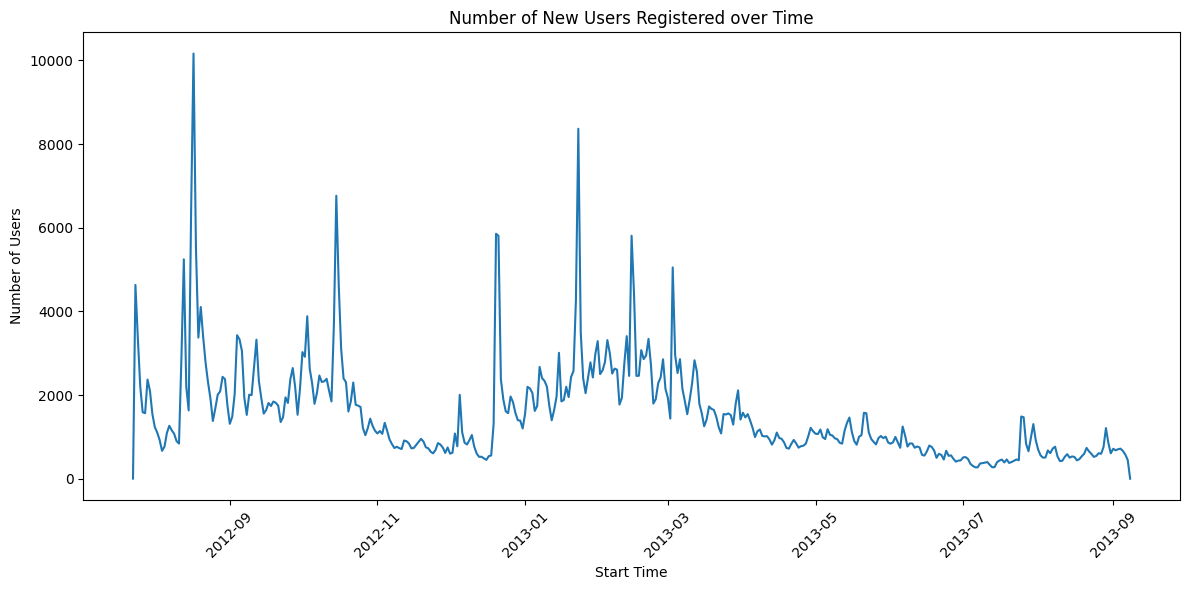

In [14]:
#time series line graph using start_time agains count of users on that start_time
user_counts = df_new.groupby('start_time_DI')['userid_DI'].count()

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(user_counts.index, user_counts.values)

plt.xlabel('Start Time')
plt.ylabel('Number of Users')
plt.title('Number of New Users Registered over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [15]:
view_percentage = (df_new['viewed'] == 1).sum() / len(df_new) * 100
print(f"Percentage of users to view the course material: {view_percentage:.2f}%")
print('No. of passive users that will be drop from dataset:', (df_new['viewed'] == 0).sum())

df_new = df_new[df_new['viewed'] == 1]

Percentage of users to view the course material: 62.43%
No. of passive users that will be drop from dataset: 240876


<ipython-input-16-2fac10eb5bf2>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  drop_counts = df_dropped.groupby('duration_bin').size()
<ipython-input-16-2fac10eb5bf2>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = df_new.groupby('duration_bin').size()


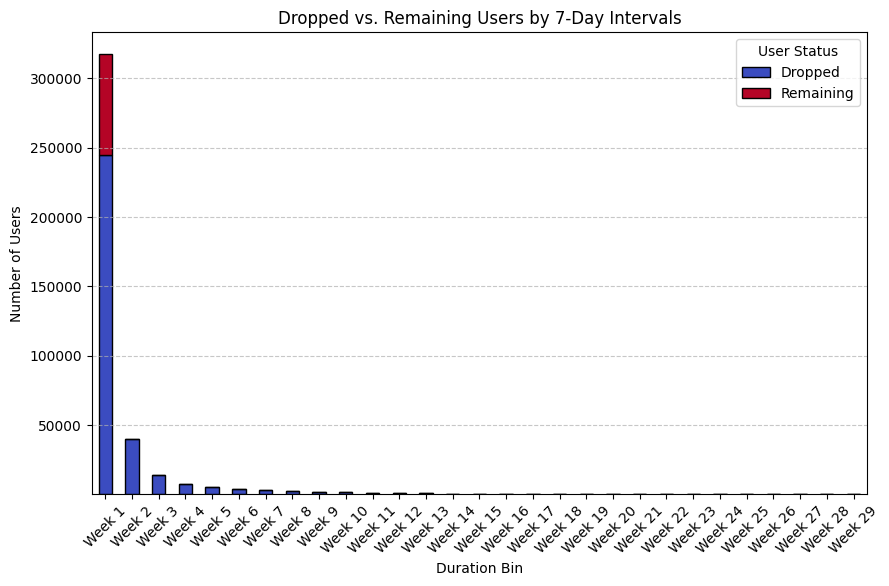

Dropout rate within 7 days active: 77.0


In [16]:
#filters for users who drop
df_dropped = df_new[df_new['complete_flag'] == 0]

# Count users who dropped in each bin
drop_counts = df_dropped.groupby('duration_bin').size()

# Count total users in each bin
total_counts = df_new.groupby('duration_bin').size()

# Calculate remaining users (total - dropped)
remaining_counts = total_counts - drop_counts

# Combine into a dataframe
df_dropout_rate = pd.DataFrame({'Dropped': drop_counts, 'Remaining': remaining_counts}).fillna(0)

# Plot stacked bar chart
df_dropout_rate.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm', edgecolor='black')

plt.title('Dropped vs. Remaining Users by 7-Day Intervals')
plt.xlabel('Duration Bin')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="User Status")

plt.show()

print('Dropout rate within 7 days active:', ((drop_counts.loc['Week 1'] / total_counts.loc['Week 1']) * 100).round(0))


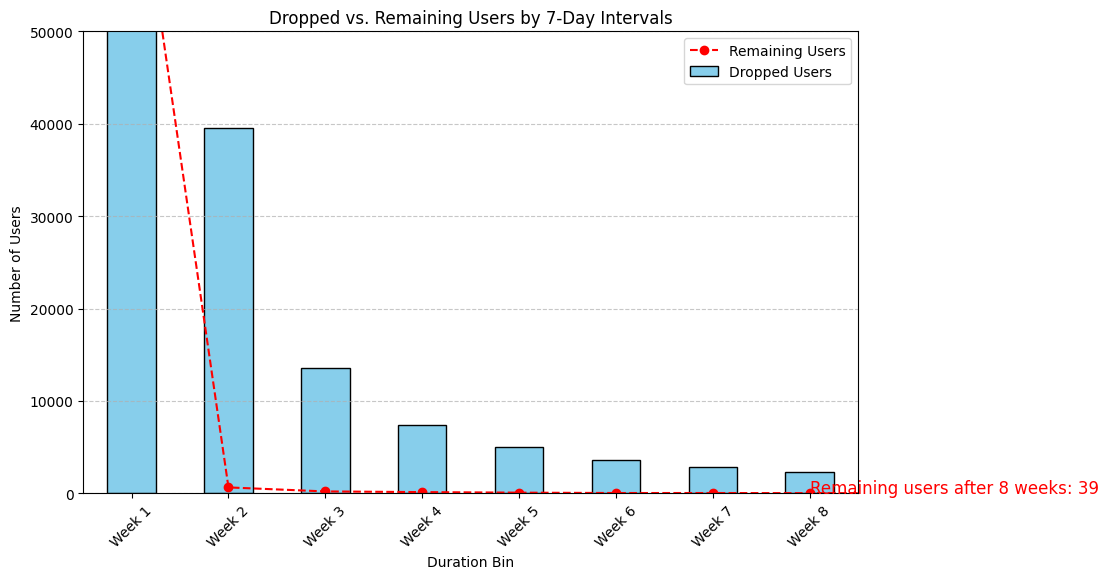

% User remained after being active for 8 weeks: 0.01


In [17]:
plt.figure(figsize=(10, 6))

# Bar plot for drop counts
drop_counts.plot(kind='bar', color='skyblue', edgecolor='black', label="Dropped Users")

# Line plot for remaining users
remaining_counts.plot(kind='line', marker='o', color='red', linestyle='dashed', label="Remaining Users")

plt.title('Dropped vs. Remaining Users by 7-Day Intervals')
plt.xlabel('Duration Bin')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Set axis limits
plt.ylim(0, 50000)  # Limiting y-axis to a max of 50,000 users
plt.xlim(-0.5, 7.5)  # Limiting x-axis to include only up to Week 8 (Index 7)


# Add annotation for Week 8
week_8_remaining = remaining_counts.loc['Week 8']
plt.text(7, week_8_remaining + 5, f'Remaining users after 8 weeks: {week_8_remaining}', color='red', fontsize=12)

plt.show()

print('% User remained after being active for 8 weeks:', ((remaining_counts.loc['Week 8'] / total_counts.sum()) * 100).round(2))

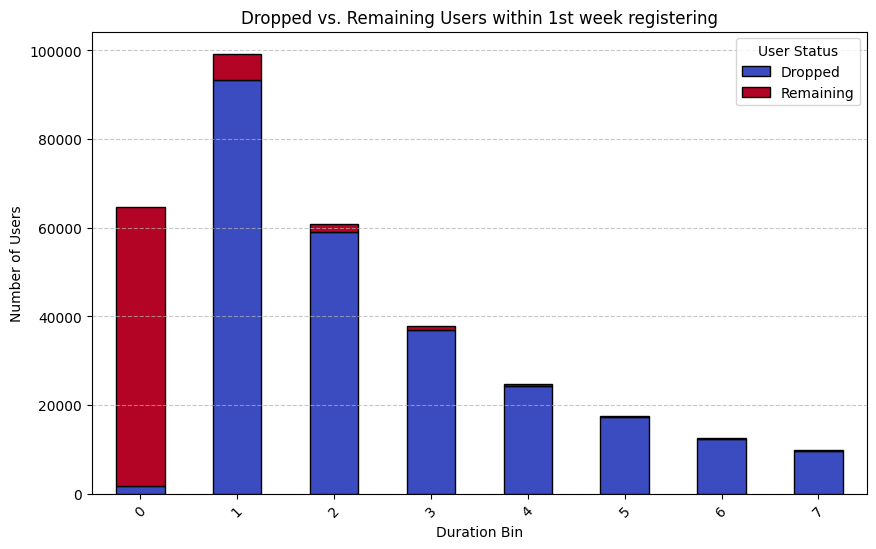

In [18]:
# Count users who dropped in each bin
drop_counts_day = df_dropped.groupby('ndays_act').size()

# Count total users in each bin
total_counts_day = df_new.groupby('ndays_act').size()

# Calculate remaining users (total - dropped)
remaining_counts_day = total_counts_day - drop_counts_day

#Combine into a dataframe
df_dropout_rate_day = pd.DataFrame({'Dropped': drop_counts_day, 'Remaining': remaining_counts_day}).fillna(0)

# Plot stacked bar chart
df_dropout_rate_day.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm', edgecolor='black')

plt.title('Dropped vs. Remaining Users within 1st week registering')
plt.xlabel('Duration Bin')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="User Status")

# Set axis limits
plt.xlim(-0.5, 7.5)  # Limiting x-axis to include only up to Week 8 (Index 7)



plt.show()

##**2) INSIGHTS OF USER'S CERTIFIED STATUS AND GRADE**

KEY TAKEAWAYS

i) From 326599 users, only 5% finished with a certification.

ii) All certified users performed with grade A, B, and C

iii) Certified users have positive correlation with numbers of events created, total active days, and grade.

iv) Obvious grade differentiation between certified and non-certified user.

v) Forum posts which may indicate whether users prefer self-learning or group-learning had no correlation with certified status.

Recommendations:

- investigate impact of grade, why does Grade C can ensure certificates to users
- strategy to induce forum engagement, if necessary

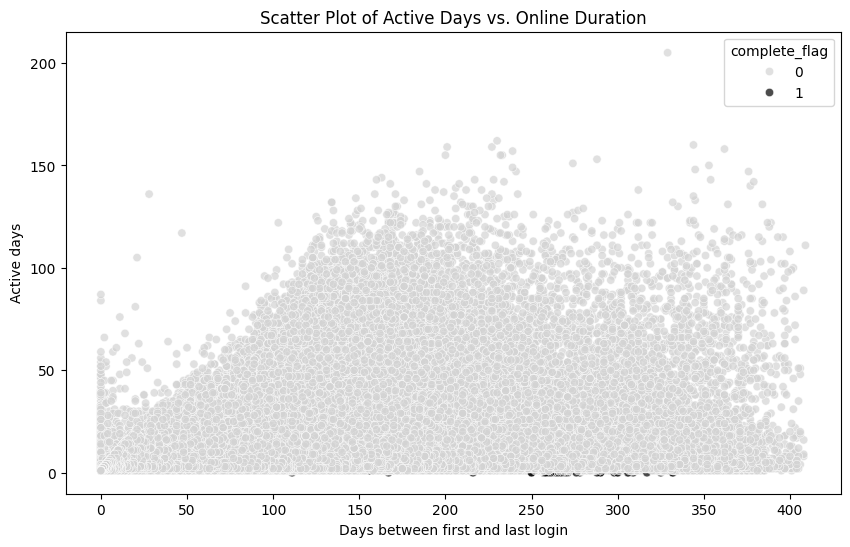

In [19]:
#scatter plot of nact_days and online duration

plt.figure(figsize=(10, 6))
sns.scatterplot(x='online_duration', y='ndays_act', data=df_new, hue='complete_flag',
                palette={0: 'lightgrey', 1: 'black'}, alpha=0.7)
plt.title('Scatter Plot of Active Days vs. Online Duration')
plt.xlabel('Days between first and last login')
plt.ylabel('Active days')
plt.show()


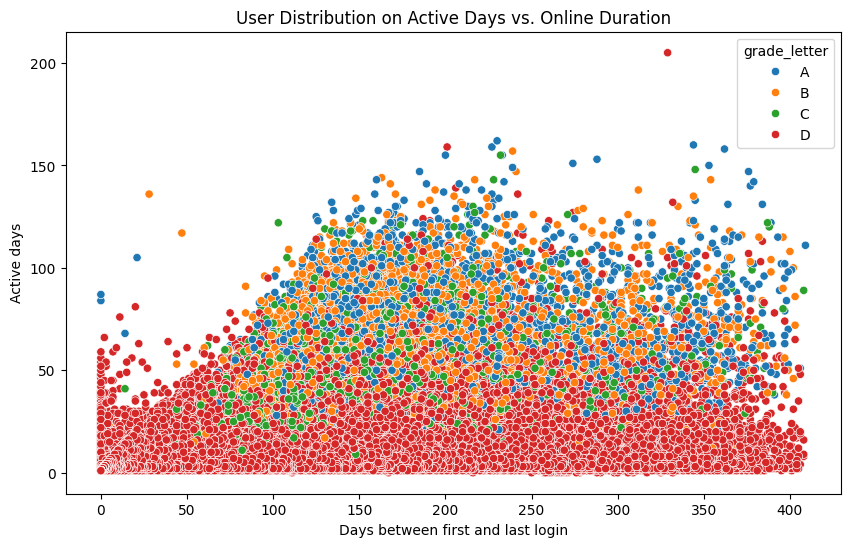

In [20]:
# User distribution on platform activities

plt.figure(figsize=(10, 6))
sns.scatterplot(x='online_duration', y='ndays_act', data=df_new, hue='grade_letter', hue_order=['A', 'B', 'C', 'D'])
plt.title('User Distribution on Active Days vs. Online Duration')
plt.xlabel('Days between first and last login')
plt.ylabel('Active days')
plt.show()


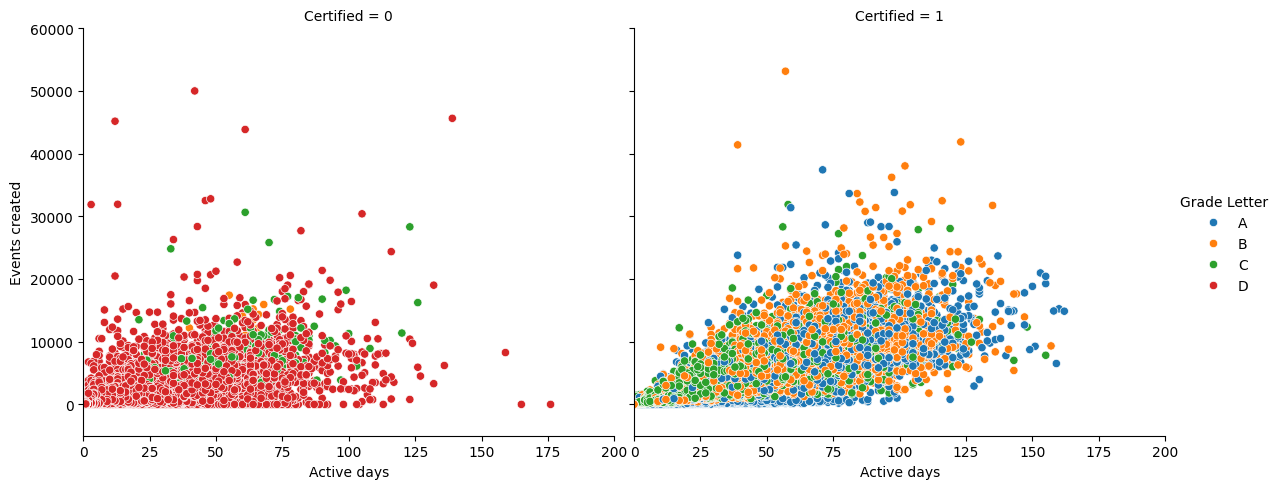

% users who certified: 5.0


In [21]:
# facetGrid for Certified = 1 and Certified = 0
g = sns.FacetGrid(df_new, col="certified", height=5, aspect=1.2)

# Scatter plot with grade_letter as hue and complete_flag as style
g.map_dataframe(sns.scatterplot, x="ndays_act", y="nevents", hue="grade_letter", hue_order=['A', 'B', 'C', 'D'])

# Adjust labels and titles
g.set(xlim=(0, 200), ylim=(-5000, 60000))
g.set_axis_labels("Active days", "Events created")
g.set_titles(col_template="Certified = {col_name}")
g.add_legend(title="Grade Letter")
plt.show()

print('% users who certified:', ((df_new['certified'] == 1).sum() / df_new['userid_DI'].nunique() * 100).round(0))

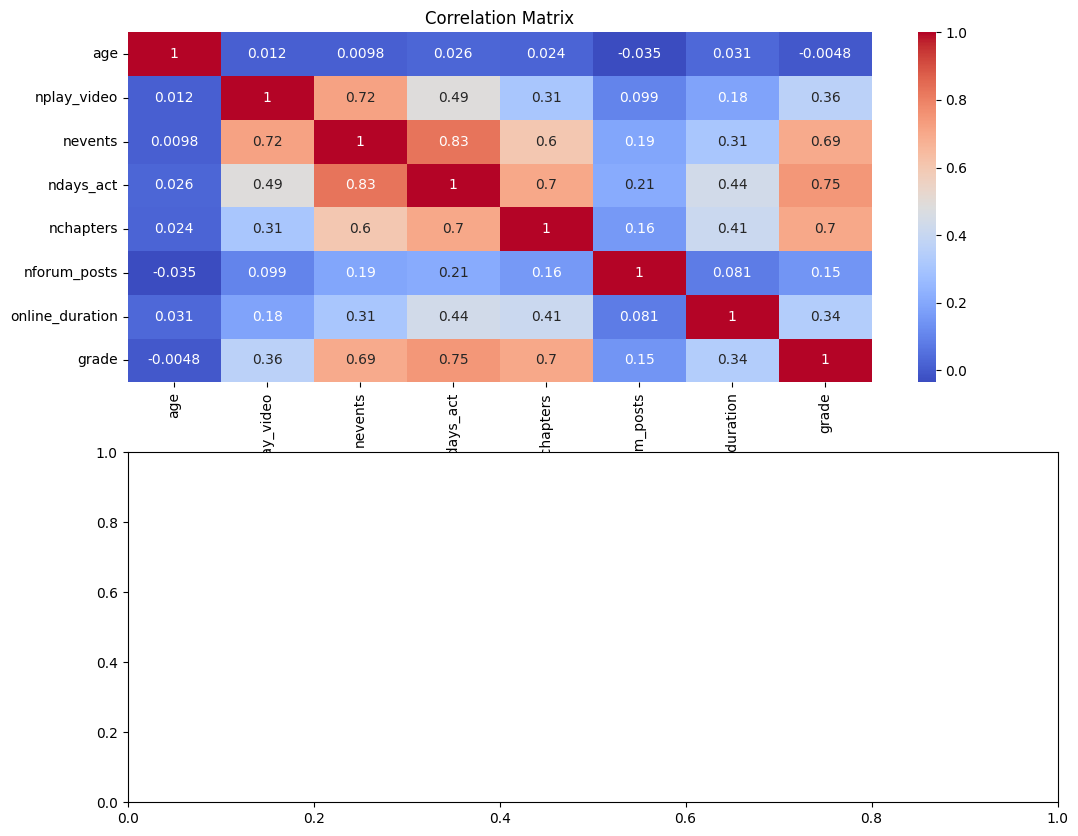

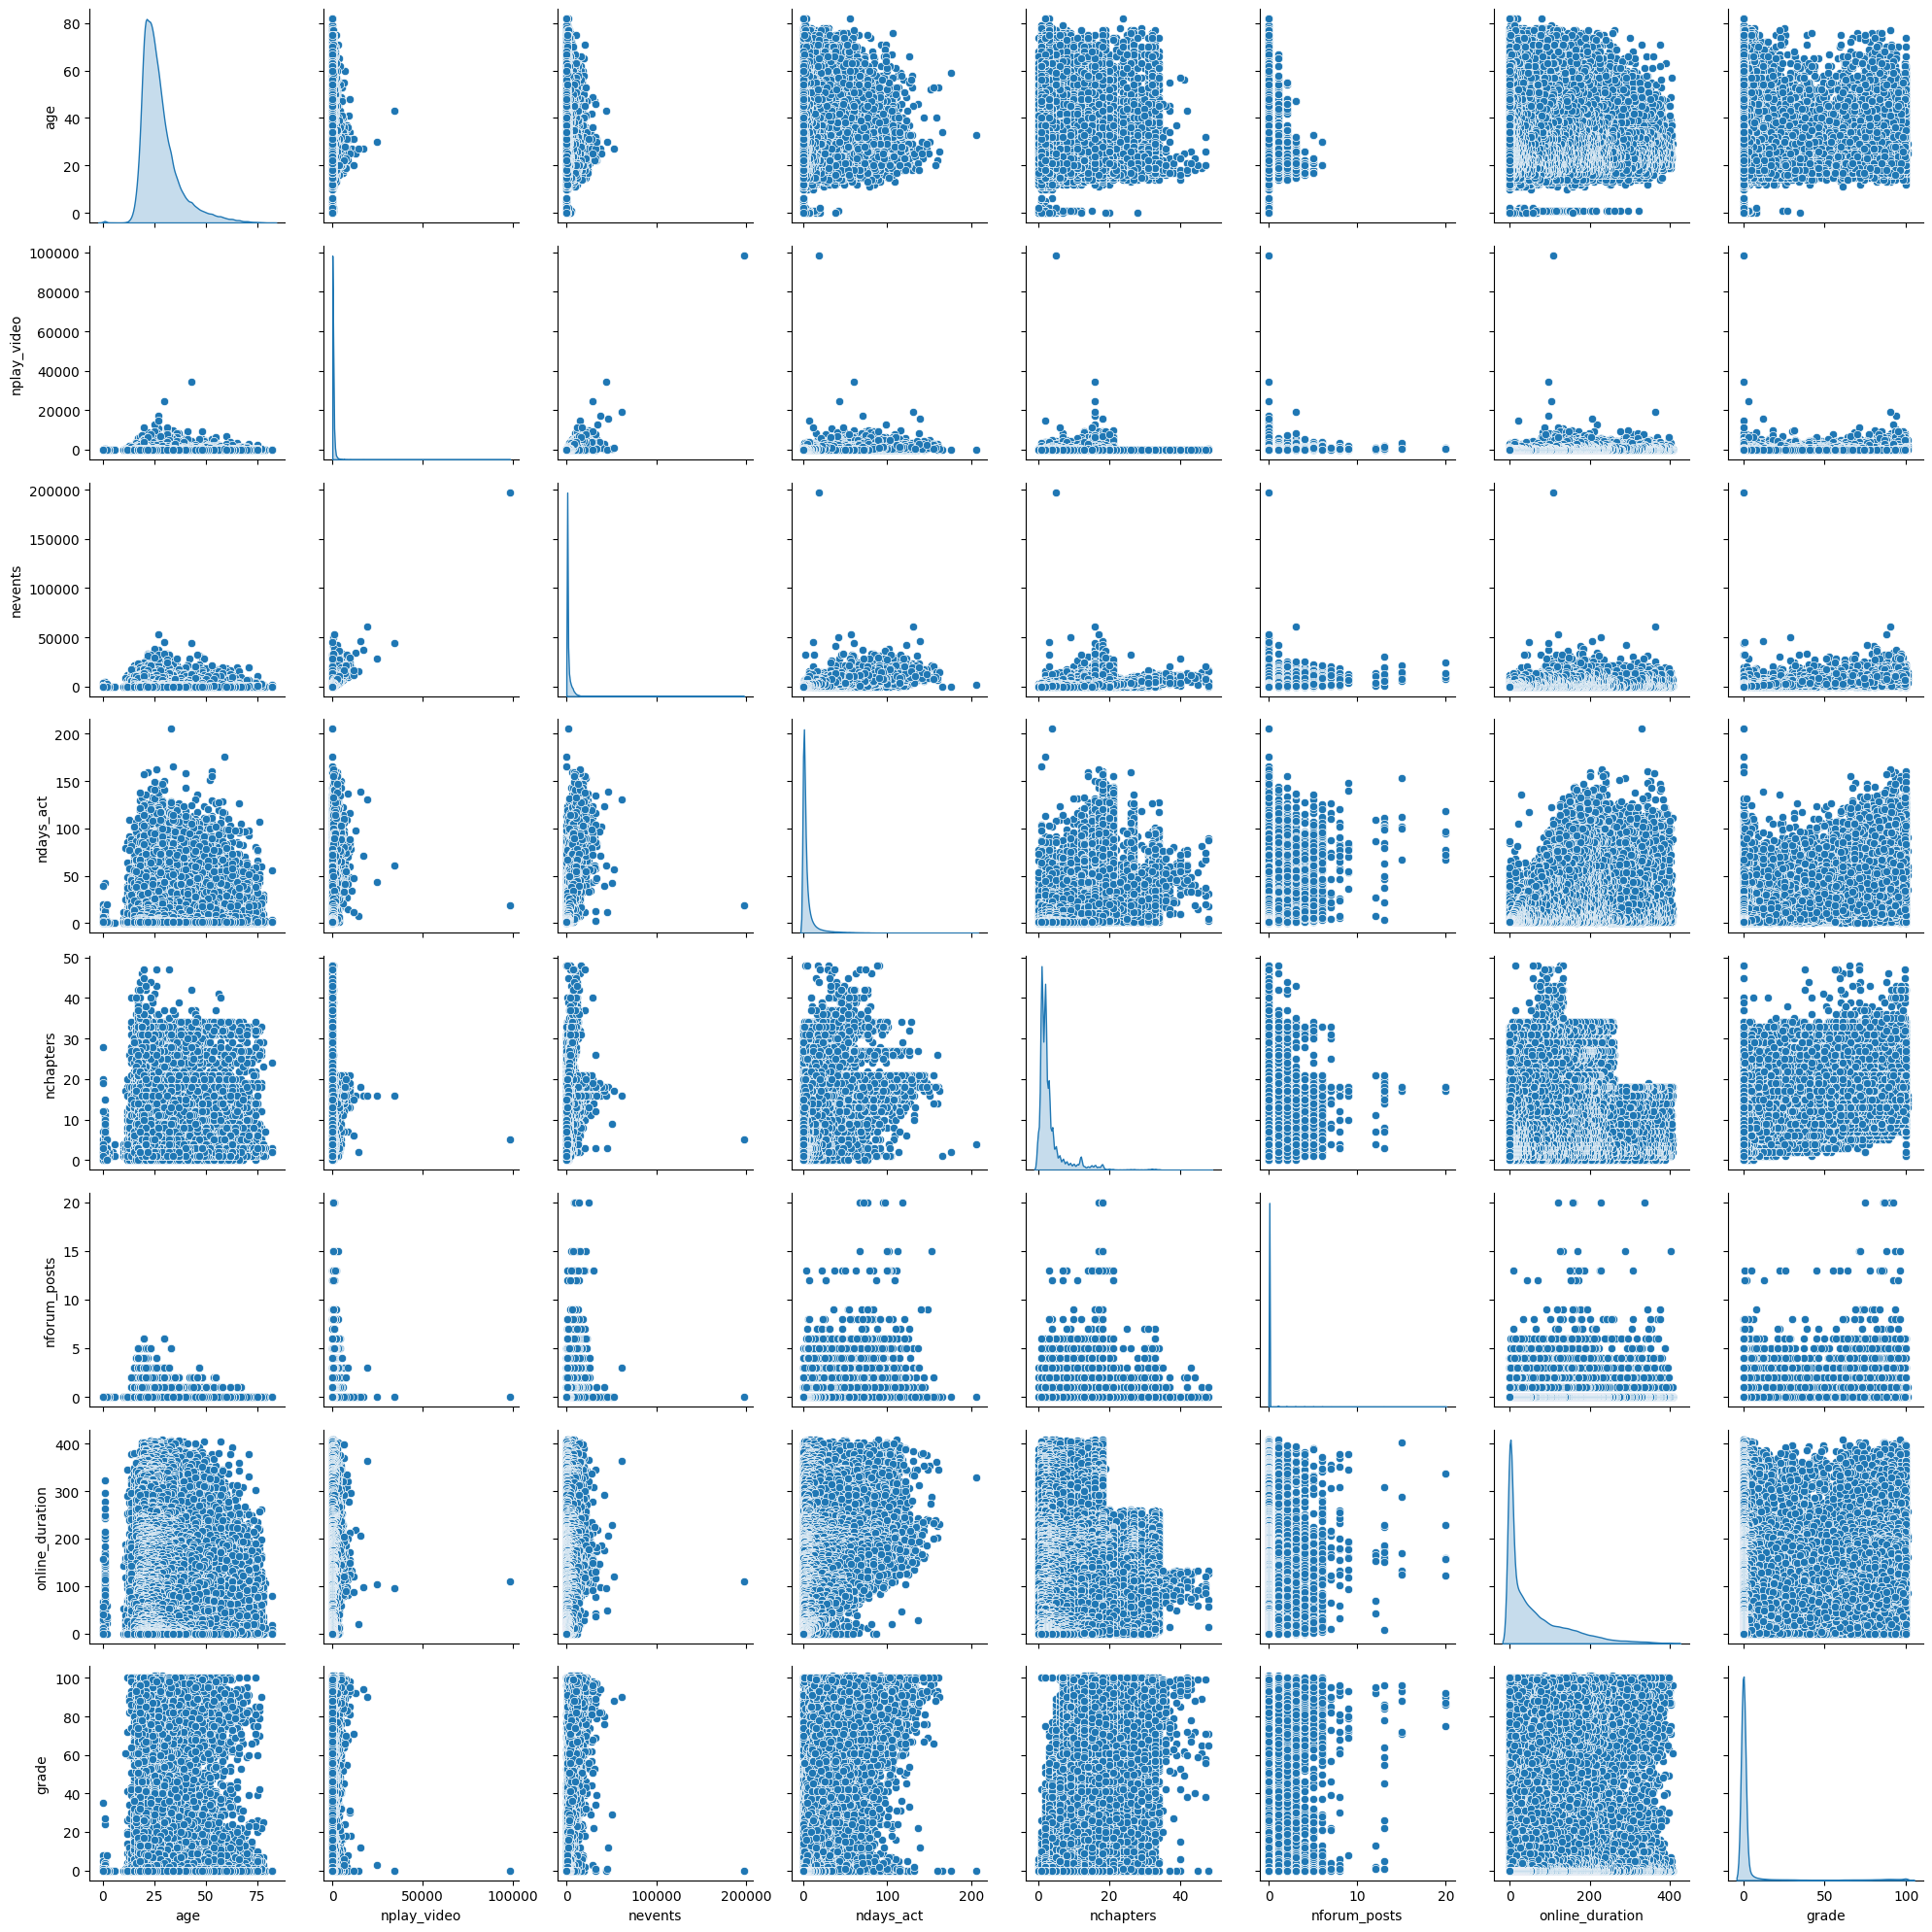

In [22]:
#correlation between 'nevents', 'ndays_act', 'nchapters', 'nforum_posts' and grade
def visualize_correlations(df):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
    metrics = ['age', 'nplay_video','nevents', 'ndays_act', 'nchapters', 'nforum_posts', 'online_duration']

    # Correlation matrix heatmap
    corr_matrix = df_new[metrics + ['grade']].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[0])
    axes[0].set_title('Correlation Matrix')

    # Pairplot
    sns.pairplot(df[metrics + ['grade']], diag_kind='kde')
    #axes[0,1].set_title('Pairwise Relationships')


    plt.tight_layout()
    plt.show()

visualize_correlations(df_new)


In [23]:
import pandas as pd
import numpy as np

def create_certification_summary(df):

    # Select all metrics for comparison
    metrics = ['age', 'grade', 'nevents', 'ndays_act', 'nchapters',
              'nplay_video', 'nforum_posts']

    # Group metrics by certification status
    summary = df_new.groupby('certified')[metrics].agg([
        ('median', 'median'),
        ('max', 'max'),
    ]).round(2)

    # Format the summary table
    summary_table = pd.DataFrame({
        'NotCertified (Median)': summary.loc[0].xs('median', level=1),
        'Certified (Median)': summary.loc[1].xs('median', level=1),
        'NotCertified (Max)': summary.loc[0].xs('max', level=1),
        'Certified (Median)': summary.loc[1].xs('median', level=1)
    })


    # Add metric descriptions
    metric_descriptions = {
        'age' : 'Age',
        'grade': 'Final Grade',
        'online_duration': 'Duration from first to last login (days)',
        'nevents': 'Number of Events',
        'ndays_act': 'Active Days',
        'nchapters': 'Chapters Completed',
        'nplay_video': 'Videos Played',
        'nforum_posts': 'Forum Posts',
        'incomplete_flag': 'Course was not completed '
    }

    summary_table.index = [metric_descriptions[metric] for metric in metrics]

    return summary_table



In [24]:
summary_table = create_certification_summary(df_new)
print(summary_table)

                    NotCertified (Median)  Certified (Median)  \
Age                                  25.0                26.0   
Final Grade                           0.0                86.0   
Number of Events                     29.0              4510.0   
Active Days                           2.0                43.0   
Chapters Completed                    2.0                16.0   
Videos Played                         0.0               240.0   
Forum Posts                           0.0                 0.0   

                    NotCertified (Max)  
Age                               82.0  
Final Grade                       79.0  
Number of Events              197757.0  
Active Days                      205.0  
Chapters Completed                48.0  
Videos Played                  98517.0  
Forum Posts                       13.0  


# PREDICTIVE MODELING

KEY TAKEAWAYS

i) Grade are the most influential determinant in predicting certificates status.

ii) This model can be used to estimate user's potential to be certified. Strategies to further encourage users can be through sending segmented emails targeting users with high likelihood to success. Example : **"You're just two chapters away from earning your certificate! We noticed you haven't completed Chapter 5 yet. Here are some resources that might help...**

In [ ]:
# classification models to predict certified colunmn, using features such as metrics

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Prepare the data for modeling
X = df_new[['grade', 'nevents', 'ndays_act', 'nchapters']]
y = df_new['certified']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     76420
           1       0.97      0.98      0.98      3633

    accuracy                           1.00     80053
   macro avg       0.99      0.99      0.99     80053
weighted avg       1.00      1.00      1.00     80053

[[76328    92]
 [   60  3573]]
Accuracy: 0.9981012579166302


<ipython-input-44-7c2bd436a586>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




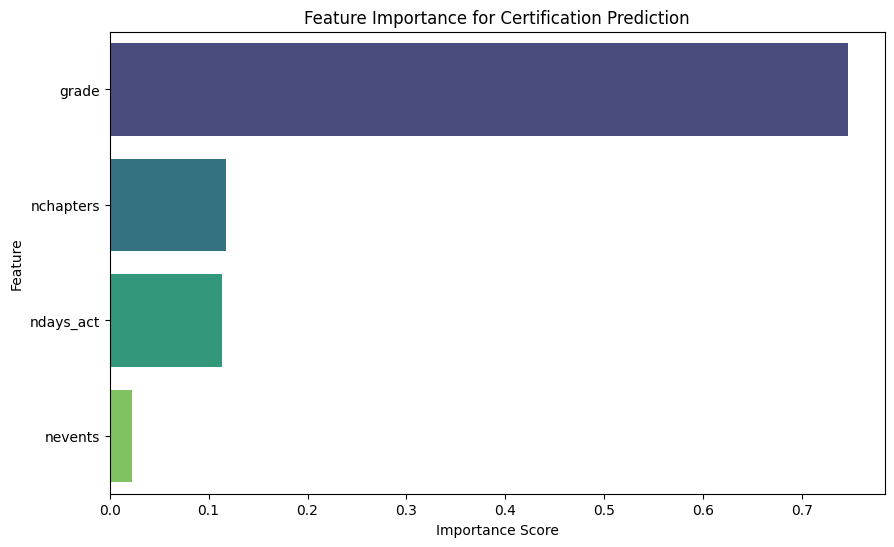

In [ ]:
# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for Certification Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


In [ ]:
# Save preprocess data into csv file for further analysis on other platform.

df_new.to_csv('course_engagement.csv', index=False)


In [ ]:
#build classification model to predict complete_flag, using features such as age, gender, ;evel of education and other metric

# Prepare the data for modeling
X = df_new[['age', 'gender', 'LoE_DI', 'grade', 'nevents', 'ndays_act', 'nchapters', 'nplay_video', 'nforum_posts', 'online_duration']] # Include relevant features
y = df_new['complete_flag']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['gender', 'LoE_DI'], drop_first=True) # Example: Assuming gender and education are categorical

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train a RandomForestClassifier (or other suitable model)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     65210
           1       1.00      1.00      1.00     14843

    accuracy                           1.00     80053
   macro avg       1.00      1.00      1.00     80053
weighted avg       1.00      1.00      1.00     80053

[[65210     0]
 [    0 14843]]
Accuracy: 1.0
